In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [16]:
from sklearn.cluster import KMeans 

In [19]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Shubham\SEM7\AIML\EXP8\healthcare-dataset-stroke-data.csv')

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df = df.dropna()
df.reset_index(inplace=True, drop=True)

In [22]:
X_numerics = df[['age', 'avg_glucose_level', 'bmi']]

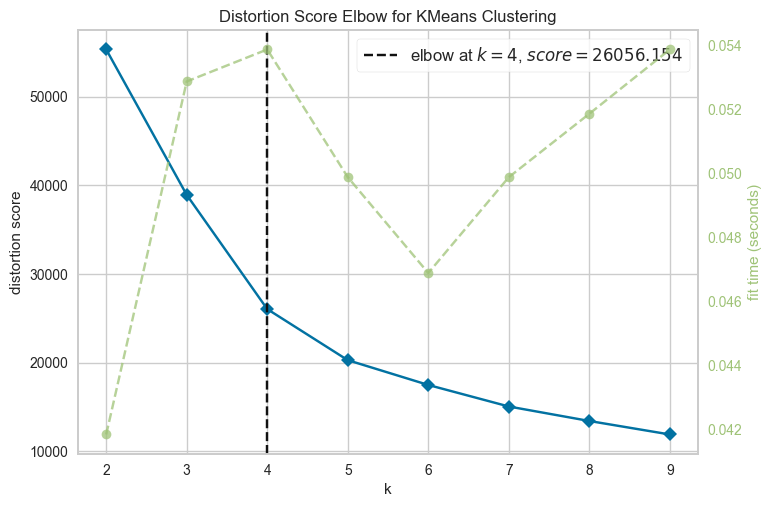

In [23]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

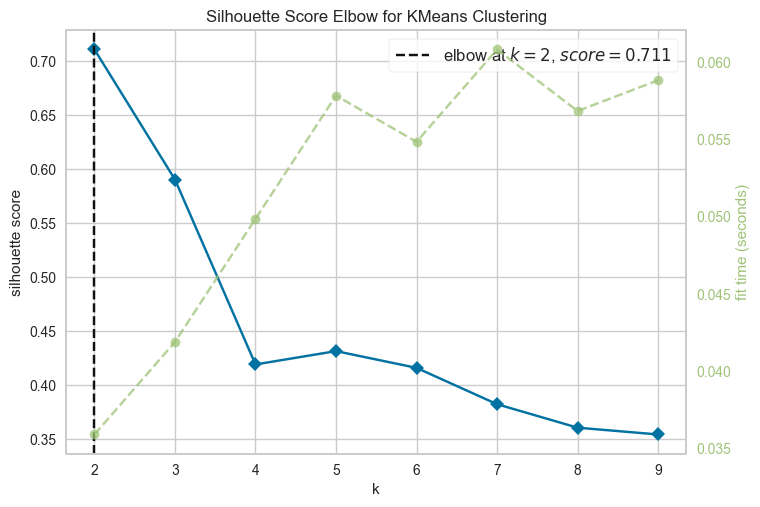

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [25]:
KM_5_clusters = KMeans(n_clusters=2, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


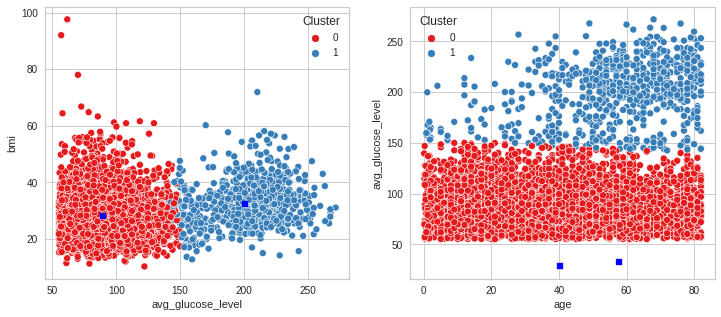

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('avg_glucose_level', 'bmi', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('age', 'avg_glucose_level', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [26]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,30
1,52


In [27]:
KM_5_clusters.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [28]:
(sum([1 if i==j else 0 for i,j in zip(np.array(df['stroke']), KM_5_clusters.labels_)])/len(df['stroke']))*100

63.41463414634146

In [5]:
!pip install GMM


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy import random
from scipy.stats import multivariate_normal
# import GMM
from GMM import GMM

ModuleNotFoundError: No module named 'GMM'

In [9]:
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    x = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x

In [ ]:
X_numerics.isna().sum()

In [ ]:
X = np.array(X_numerics[['age','avg_glucose_level']])

In [ ]:
def plot(title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

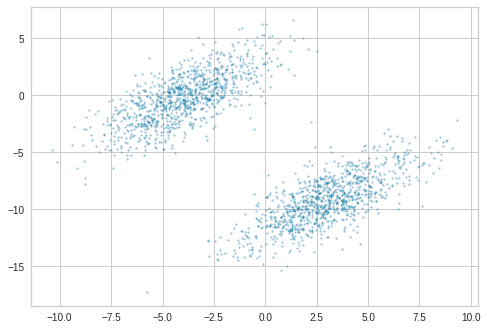

In [ ]:
X = gen_data(k=2, dim=2, points_per_cluster=1000)

In [ ]:
gmm = GMM(2, 2)

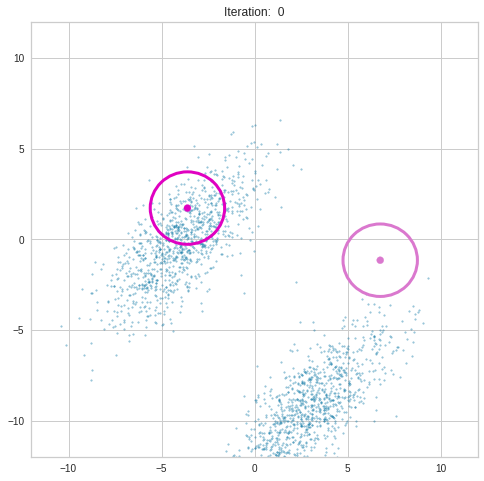

Iteration: 1, log-likelihood: -9441.4253


<Figure size 576x396 with 0 Axes>

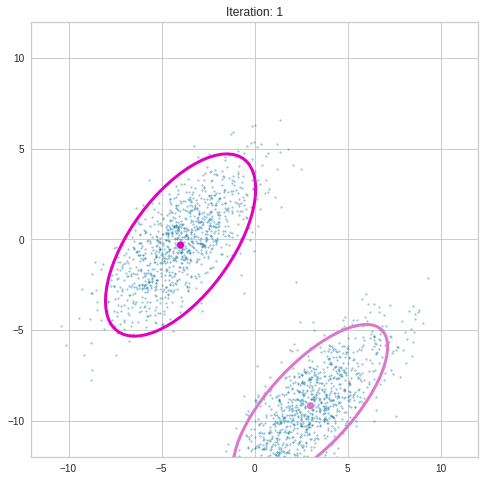

Iteration: 2, log-likelihood: -9391.6482


<Figure size 576x396 with 0 Axes>

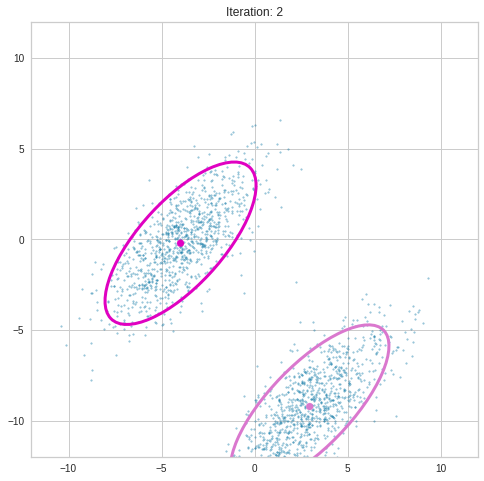

Iteration: 3, log-likelihood: -9391.5138


<Figure size 576x396 with 0 Axes>

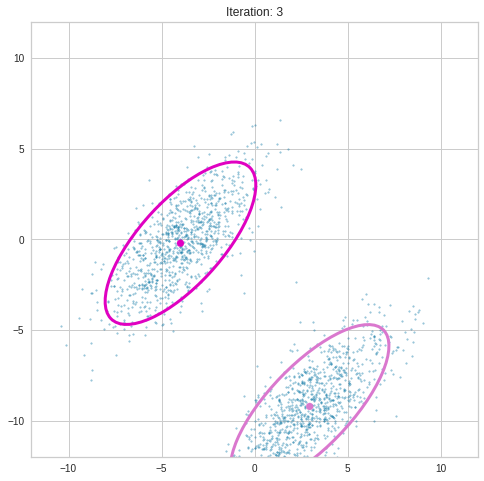

<Figure size 576x396 with 0 Axes>

In [ ]:
# Training the GMM using EM

# Initialize EM algo with data
gmm.init_em(X)
num_iters = 3
# Saving log-likelihood
log_likelihood = [gmm.log_likelihood(X)]
# plotting
plot("Iteration:  0")
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Computing log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    # plotting
    plot(title="Iteration: " + str(e+1))

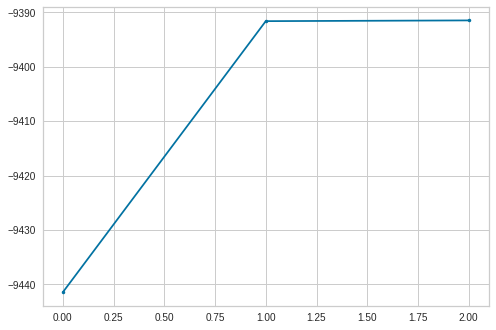

In [ ]:
# Plot log-likelihood
plt.plot(log_likelihood[1:], marker='.')

In [ ]:
# Plotting for creating GIF of log-likehood graph
for i in range(1, len(log_likelihood)):
    plt.title("log-likelihood for iteration: " + str(i))
    plt.plot(log_likelihood[1:1+i], marker='.')
    axes = plt.axes()
    axes.set_ylim([min(log_likelihood[1:])-50, max(log_likelihood[1:])+50])
    axes.set_xlim([-2, 32])
    plt.savefig("ll_" + str(i))
    plt.clf()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


<Figure size 576x396 with 0 Axes>